<html>
    <h1>
        CS50’s Introduction to Programming with Python
    </h1>
    <p1>
        These problem sets are available at: <a href="https://cs50.harvard.edu/python/psets/">https://cs50.harvard.edu/python/psets/</a>
    </p1>
 
</html>

<h3>
    Problem Set 7
</h3>

<h4>
    NUMB3RS
</h4>

```sql
In Season 5, Episode 23 of NUMB3RS, a supposed IP address appears on screen, 275.3.6.28, which isn’t actually a valid IPv4 (or IPv6) address.

An IPv4 address is a numeric identifier that a device (or, on TV, hacker) uses to communicate on the internet, akin to a postal address in the real world, typically formatted in dot-decimal notation as #.#.#.#. But each # should be a number between 0 and 255, inclusive. Suffice it to say 275 is not in that range! If only NUMB3RS had validated the address in that scene!

In a file called numb3rs.py, implement a function called validate that expects an IPv4 address as input as a str and then returns True or False, respectively, if that input is a valid IPv4 address or not.

Structure numb3rs.py as follows, wherein you’re welcome to modify main and/or implement other functions as you see fit, but you may not import any other libraries. You’re welcome, but not required, to use re and/or sys.

import re
import sys


def main():
    print(validate(input("IPv4 Address: ")))


def validate(ip):
    ...


...


if __name__ == "__main__":
    main()
Either before or after you implement validate in numb3rs.py, additionally implement, in a file called test_numb3rs.py, two or more functions that collectively test your implementation of validate thoroughly, each of whose names should begin with test_ so that you can execute your tests with:

pytest test_numb3rs.py
```

In [ ]:
import re
import sys


def main():
    print(validate(input("IPv4 Address: ")))


def validate(ip):
    matches=re.search(r'(\d{1,3})\.(\d{1,3})\.(\d{1,3})\.(\d{1,3})',ip)
    if matches:
        for i in range (1,5):
            if int(matches.group(i))<=0 or int(matches.group(i))>=256:
                return False
        return True
    else:
        return False

if __name__ == "__main__":
    main()

In [ ]:
#Test Function
from ip_validation import validate

def main():
    test_validate()

def test_validate():
    assert validate('255.255.255.255') == True
    assert validate('512.512.512.512') == False
    assert validate('1.2.3.1000') == False
    assert validate('192.168.001.1') == False
    assert validate('Cat') == False
    assert validate('1.2.3.4') == True

<h3>
    Watch on YouTube
</h3>

```sql
It turns out that (most) YouTube videos can be embedded in other websites, just like the above. For instance, if you visit https://youtu.be/xvFZjo5PgG0 on a laptop or desktop, click Share, and then click Embed, you’ll see HTML (the language in which web pages are written) like the below, which you could then copy into your own website’s source code, wherein iframe is an HTML “element,” and src is one of several HTML “attributes” therein, the value of which, between quotes, is https://www.youtube.com/embed/xvFZjo5PgG0.

<iframe width="560" height="315" src="https://www.youtube.com/embed/xvFZjo5PgG0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
Because some HTML attributes are optional, you could instead minimally embed just the below.

<iframe src="https://www.youtube.com/embed/xvFZjo5PgG0"></iframe>
Suppose that you’d like to extract the URLs of YouTube videos that are embedded in pages (e.g., https://www.youtube.com/embed/xvFZjo5PgG0), converting them back to shorter, shareable youtu.be URLs (e.g., https://youtu.be/xvFZjo5PgG0) where they can be watched on YouTube itself.

In a file called watch.py, implement a function called parse that expects a str of HTML as input, extracts any YouTube URL that’s the value of a src attribute of an iframe element therein, and returns its shorter, shareable youtu.be equivalent as a str. Expect that any such URL will be in one of the formats below. Assume that the value of src will be surrounded by double quotes. And assume that the input will contain no more than one such URL. If the input does not contain any such URL at all, return None.

http://youtube.com/embed/xvFZjo5PgG0
https://youtube.com/embed/xvFZjo5PgG0
https://www.youtube.com/embed/xvFZjo5PgG0
Structure watch.py as follows, wherein you’re welcome to modify main and/or implement other functions as you see fit, but you may not import any other libraries. You’re welcome, but not required, to use re and/or sys.

import re
import sys


def main():
    print(parse(input("HTML: ")))


def parse(s):
    ...


...


if __name__ == "__main__":
    main()
```

In [49]:
import re
import sys


def main():
    print(parse(input("HTML: ")))


def parse(s):
    matches=re.search(r'src="([^"]+)"', s)
    if not matches:
        return None
        
    url=matches.group(1)
    if url.lower().startswith(('http://youtube.com/embed/','http://www.youtube.com/embed/','https://youtube.com/embed/','https://www.youtube.com/embed/')):
        new_url=url.split('/')[-1]
        return 'https://youtu.be/'+new_url
    return None

if __name__ == "__main__":
    main()

HTML:  <iframe src="http://www.youtube.com/embed/xvFZjo5PgG0"></iframe>


https://youtu.be/xvFZjo5PgG0


In [47]:
main()

HTML:  <iframe width="560" height="315" src="https://www.youtube.com/embed/xvFZjo5PgG0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


https://youtu.be/xvFZjo5PgG0


In [48]:
main()

HTML:  <iframe width="560" height="315" src="https://cs50.harvard.edu/python"></iframe>


None


<h3>
    Time Conversion
</h3>

```sql
In a file called working.py, implement a function called convert that expects a str in any of the 12-hour formats below and returns the corresponding str in 24-hour format (i.e., 9:00 to 17:00). Expect that AM and PM will be capitalized (with no periods therein) and that there will be a space before each. Assume that these times are representative of actual times, not necessarily 9:00 AM and 5:00 PM specifically.

9:00 AM to 5:00 PM
9 AM to 5 PM
9:00 AM to 5 PM
9 AM to 5:00 PM
Raise a ValueError instead if the input to convert is not in either of those formats or if either time is invalid (e.g., 12:60 AM, 13:00 PM, etc.). But do not assume that someone’s hours will start ante meridiem and end post meridiem; someone might work late and even long hours (e.g., 5:00 PM to 9:00 AM).

Structure working.py as follows, wherein you’re welcome to modify main and/or implement other functions as you see fit, but you may not import any other libraries. You’re welcome, but not required, to use re and/or sys.

import re
import sys


def main():
    print(convert(input("Hours: ")))


def convert(s):
    ...


...


if __name__ == "__main__":
    main()
Either before or after you implement convert in working.py, additionally implement, in a file called test_working.py, three or more functions that collectively test your implementation of convert thoroughly, each of whose names should begin with test_ so that you can execute your tests with:

pytest test_working.py
```

In [104]:
import re
import sys


def main():
    print(convert(input("Hours: ")))


def convert(s):
    if s=='':
        raise ValueError
    matches=re.search(r'(\d{1,2})(:\d{2})?\s*(AM|PM)\s*to\s*(\d{1,2})(:\d{2})?\s*(AM|PM)', s, re.IGNORECASE)
    start_hr=0
    start_min=0
    end_hr=0
    end_min=0
    if not matches:
        raise ValueError
        return None
    if matches.group(3)=='AM':
        start_hr=int(matches.group(1))
    else:
        start_hr=int(matches.group(1))+12
    if matches.group(2)==None:
        start_min=0
    else:
        start_min=int(matches.group(2).split(':')[1])
    if matches.group(6)=='AM':
        end_hr=int(matches.group(4))
    else:
        end_hr=int(matches.group(4))+12
    if matches.group(5)==None:
        end_min=0
    else:
        end_min=int(matches.group(5).split(':')[1])
    if start_hr<0 or (start_hr>23 and start_min>0) or end_hr<0 or (end_hr>23 and end_min>0) or start_min>59 or start_min<0 or end_min >59 or end_min<0:
        raise ValueError
        return None

    return f'{start_hr:02d}:{start_min:02d} to {end_hr:02d}:{end_min:02d}'
    

if __name__ == "__main__":
    main()

Hours:  9 AM to 5 PM


09:00 to 17:00


In [ ]:
#Test Function
from time_convert import convert

def main():
    test_convert()

def test_convert():
    assert convert('9 AM to 5 PM') == '09:00 to 17:00'
    assert convert('9:00 AM to 5:00 PM') == '09:00 to 17:00'
    assert convert('10 AM to 8:50 PM') == '10:00 to 20:50'
    assert convert('10:30 PM to 8 AM') == '22:30 to 08:00'

        # Invalid cases
    try:
        convert('')
    except ValueError:
        pass
    else:
        assert False

    try:
        convert('25 AM to 5 PM')
    except ValueError:
        pass
    else:
        assert False

    try:
        convert('9 AM 5 PM')  # missing 'to'
    except ValueError:
        pass
    else:
        assert False

<h3>
    Um
</h3>

```sql
It’s not uncommon, in English, at least, to say “um” when trying to, um, think of a word. The more you do it, though, the more noticeable it tends to be!

In a file called um.py, implement a function called count that expects a line of text as input as a str and returns, as an int, the number of times that “um” appears in that text, case-insensitively, as a word unto itself, not as a substring of some other word. For instance, given text like hello, um, world, the function should return 1. Given text like yummy, though, the function should return 0.

Structure um.py as follows, wherein you’re welcome to modify main and/or implement other functions as you see fit, but you may not import any other libraries. You’re welcome, but not required, to use re and/or sys.

import re
import sys


def main():
    print(count(input("Text: ")))


def count(s):
    ...


...


if __name__ == "__main__":
    main()
Either before or after you implement count in um.py, additionally implement, in a file called test_um.py, three or more functions that collectively test your implementation of count thoroughly, each of whose names should begin with test_ so that you can execute your tests with:

pytest test_um.py
```

In [ ]:
import re
import sys


def main():
    print(count(input("Text: ")))


def count(s):
    if s=='':
        return 0
    matches=re.findall(r'\bum\b', s, re.IGNORECASE)
    return len(matches)


if __name__ == "__main__":
    main()

In [ ]:
#Test Function
from count_um import count

def main():
    test_count()

def test_count():
    assert count('um') == 1
    assert count('um?') == 1
    assert count('Um, thanks for the album') == 1
    assert count('Um, thanks, um...') == 2
    assert count('Thankum') == 0

<h3>
    Response Validation
</h3>

<html><p><code>
When creating a Google Form that prompts users for a short answer (or paragraph), it’s possible to enable response validation and require that the user’s input match a regular expression. For instance, you could require that a user input an email address with a regex like this one:

^[a-zA-Z0-9.!#$%&'*+\/=?^_`{|}~-]+@[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?(?:\.[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?)*$
Or you could more easily use Google’s built-in support for validating an email address, per the screenshot below, much like you could use a library in your own code:
</code>
</p>
</html>

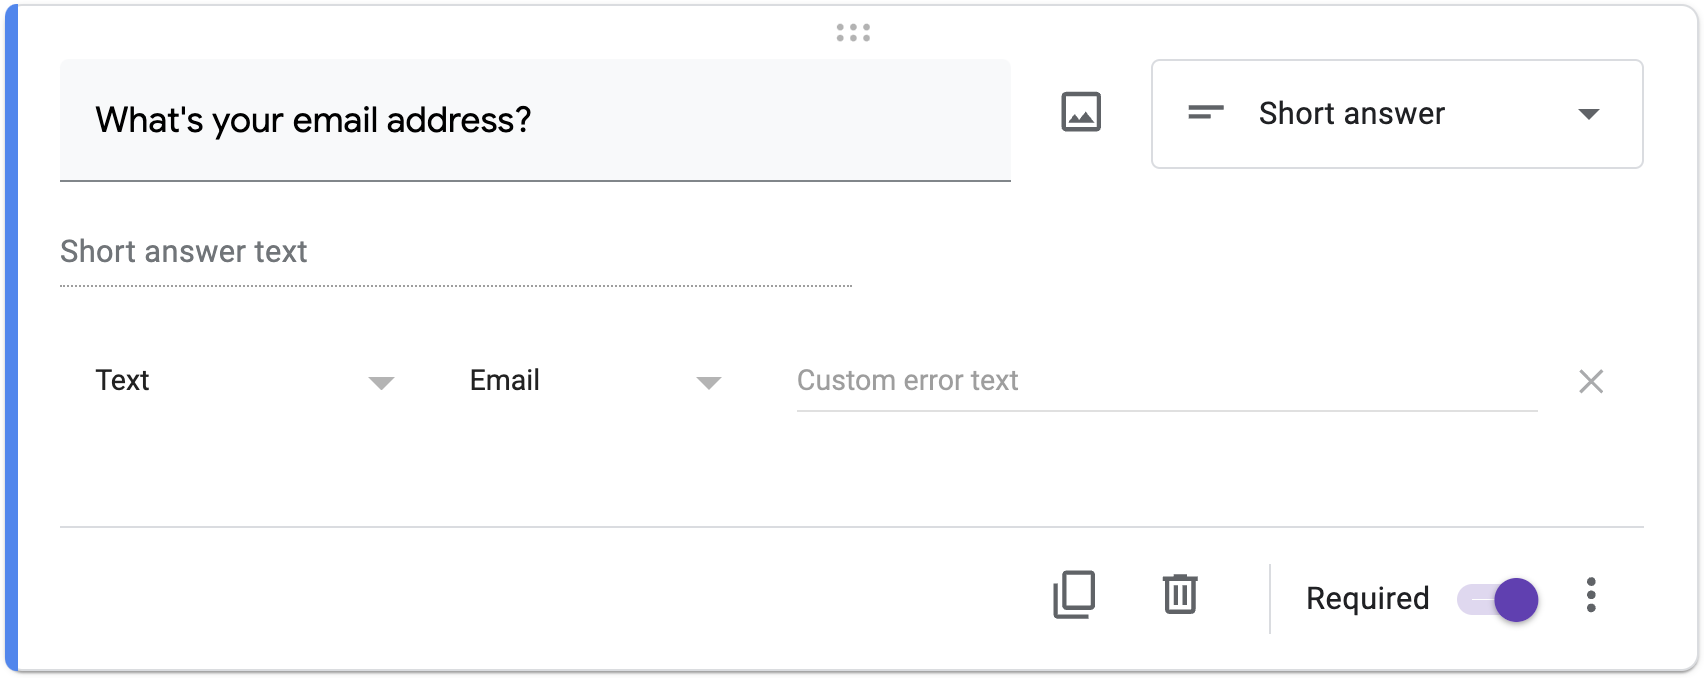![image.png]

<html><p><code>
In a file called response.py, using either validator-collection or validators from PyPI, implement a program that prompts the user for an email address via input and then prints Valid or Invalid, respectively, if the input is a syntatically valid email address. You may not use re. And do not validate whether the email address’s domain name actually exists.
</code>
</p>
</html>

In [146]:
import validators


def main():
    print('Valid' if validator(input("Email: ")) else 'Invalid')


def validator(s):
    if s=='':
        return False
    return validators.email(s)


if __name__ == "__main__":
    main()

Email:  someone@example.com


Valid


In [147]:
main()

Email:  malan@harvard.edu


Valid


In [148]:
main()

Email:  


Invalid


In [149]:
main()

Email:  malan@@@harvard.edu


Invalid


In [150]:
main()

Email:  malan@harvard.edu.com


Valid


In [151]:
main()

Email:  malan@harvard..edu


Invalid


#### End